In [20]:
import tensorflow as tf
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np
import os

In [25]:
model = tf.keras.models.load_model('imageclassifier.keras')

In [26]:
model

<Sequential name=sequential, built=True>

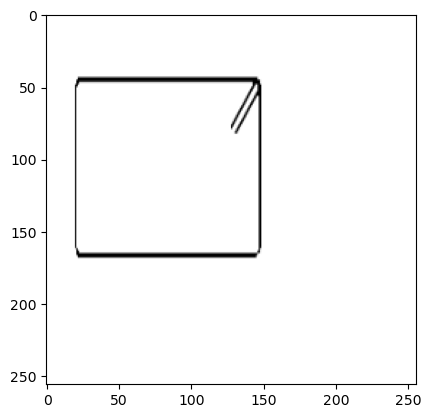

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
Image belong to the Overlapping class


In [27]:
# Load and preprocess the image
img = cv2.imread('eval3.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

# Predict the class
predict = model.predict(np.expand_dims(resize/255, 0))

class_names = ['Circular', 'Normal', 'Overlapping']
predicted_class = np.argmax(predict)

print(f'Image belong to the {class_names[predicted_class]} class')